# Numerov Implementation

In [75]:
import pandas as pd
import numpy as np
import scipy.constants as const
import matplotlib.pyplot as plt
import scipy.linalg as sla

In [282]:
# Data import
scan_dat = pd.read_csv("scan_data.dat",sep="\t",names=["Distances", "Energy", "Dipole_vectors_xyz"])

eigenvalues = pd.read_csv("numerov.dat", skiprows=1, nrows=1, sep="\s+",names=["a","b","c","d","e","f"])

# first we import the scan data

reduced_mass = 9.499201581000

print(eigenvalues)


              a         b         c         d          e          f
#  Eigenvalues:  1.484792  4.423119  7.320727  10.177919  12.995052


[  1.4847658    4.4229446    7.32012947  10.17647665  12.99222088
  15.76761536  18.50289409  21.19826777  23.85392913  26.47005429
  29.04680294  31.58432094  34.08274578  36.54221334  38.96286241
  41.34483414  43.68827088  45.99331504  48.26011174  50.48881272
  52.6795798   54.83258604  56.94801293  59.02604576  61.06686903
  63.07066507  65.03761524  66.96790241  68.86171249  70.71923288
  72.54064793  74.32613567  76.07589244  77.79034381  79.47126427
  81.12568074  82.77300625  84.44624723  86.17737371  87.98244069
  89.86294302  91.8140995   93.82998009  95.90521032  98.03525102
 100.21629128 102.44508713 104.71882423 107.0350147  109.39142087
 111.78599918 114.21685851 116.68222861 119.18043584 121.70988422
 124.26904054 126.85642237 129.4705883  132.11013014 134.77366613
 137.45983554 140.16729406 142.89470978 145.6407599  148.40412769
 151.18349997 153.97756507 156.78501054 159.60452153 162.43477928
 165.27445952 168.12223119 170.97675514 173.83668295 176.70065588
 179.56730

(-5.0, 50.0)

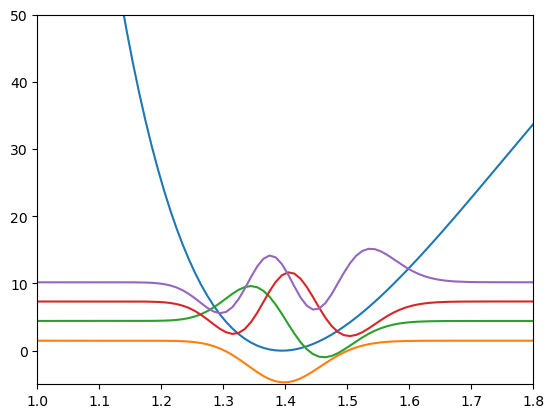

In [309]:

# Potential Energy matrix

potential_energy = scan_dat.loc[:, "Energy"]

# scale potential energy from harteee to kcal

potential_energy = potential_energy *6.275095E2

# normize the matrix with the minimum value

minimum_potential_energy = np.min(potential_energy)


# x_squared 

x_squared = (0.01)**2


potential_energy = potential_energy - minimum_potential_energy



# Distances matrix

distances = scan_dat.loc[:, "Distances"]



# potential matrix diagonal matrix

potential_energy_matrix = np.diag(potential_energy)





# Finite differences mats

f_d_c_mat_2 = np.zeros((np.shape(potential_energy_matrix)[0],np.shape(potential_energy_matrix)[0]))
f_d_c_mat_4 = np.zeros((np.shape(potential_energy_matrix)[0],np.shape(potential_energy_matrix)[0]))
f_d_c_mat_6 = np.zeros((np.shape(potential_energy_matrix)[0],np.shape(potential_energy_matrix)[0]))
f_d_c_mat_8 = np.zeros((np.shape(potential_energy_matrix)[0],np.shape(potential_energy_matrix)[0]))

i,j = np.indices(f_d_c_mat_2.shape)



# Compare different finite difference coefficients:

# order of derivative = 2

# first accuracy 2
f_d_c_mat_2[i==j] = -2
f_d_c_mat_2[i==j-1] = 1
f_d_c_mat_2[i==j+1] = 1
# second accuracy 4
f_d_c_mat_4[i==j] = -5/2
f_d_c_mat_4[i==j-1] = 4/3
f_d_c_mat_4[i==j+1] = 4/3
f_d_c_mat_4[i==j-2] = -1/12
f_d_c_mat_4[i==j+2] = -1/12
# third accuracy 6
f_d_c_mat_6[i==j] = -49/18
f_d_c_mat_6[i==j-1] = 3/2
f_d_c_mat_6[i==j+1] = 3/2
f_d_c_mat_6[i==j-2] = -3/20
f_d_c_mat_6[i==j+2] = -3/20
f_d_c_mat_6[i==j-3] = 1/90
f_d_c_mat_6[i==j+3] = 1/90
# fourth accuracy 8
f_d_c_mat_8[i==j] = -205/72
f_d_c_mat_8[i==j-1] = 8/5
f_d_c_mat_8[i==j+1] = 8/5
f_d_c_mat_8[i==j-2] = -1/5
f_d_c_mat_8[i==j+2] = -1/5
f_d_c_mat_8[i==j-3] = 8/315
f_d_c_mat_8[i==j+3] = 8/315
f_d_c_mat_8[i==j-4] = -1/560
f_d_c_mat_8[i==j-4] = -1/560


# Define Scaling Factor

scaling_fact = ((const.hbar**2 / (2*reduced_mass)) * 1E20 * const.Avogadro**2 ) / 4.184 


# 

ham_2 =  f_d_c_mat_2 *  (1/x_squared) * scaling_fact
ham_4 =  f_d_c_mat_4 *  (1/x_squared) * scaling_fact
ham_6 =  f_d_c_mat_6 *  (1/x_squared) * scaling_fact
ham_8 =  f_d_c_mat_8 *  (1/x_squared) * scaling_fact


energy_mat_2 = -ham_2 + potential_energy_matrix
energy_mat_4 = -ham_4 + potential_energy_matrix
energy_mat_6 = -ham_6 + potential_energy_matrix
energy_mat_8 = -ham_8 + potential_energy_matrix



eigenvalues_2, eigenvectors_2= np.linalg.eigh(energy_mat_2)
eigenvalues_4, eigenvectors_4= np.linalg.eigh(energy_mat_4)
eigenvalues_6, eigenvectors_6= np.linalg.eigh(energy_mat_6)
eigenvalues_8, eigenvectors_8= np.linalg.eigh(energy_mat_8)


plt.plot(distances,potential_energy)
plt.plot(distances,eigenvectors_6[:,:4] * 20 + eigenvalues_6[:4])
plt.xlim(1,1.8)
plt.ylim(-5,50)


In [317]:
#
eigenvalues_numpy = eigenvalues.to_numpy()
eigenvalues_slices = eigenvalues_numpy[0,1:]
print(eigenvalues_slices)

# Calculate the differences of all the eigenvalues with the different methods

diff_2 = abs(eigenvalues_2[:5] - eigenvalues_slices)
diff_4 = abs(eigenvalues_4[:5] - eigenvalues_slices)
diff_6 = abs(eigenvalues_6[:5] - eigenvalues_slices)
diff_8 = abs(eigenvalues_8[:5] - eigenvalues_slices)

print(diff_2)
print(diff_4)
print(diff_6)
print(diff_8)

fig, ax = plt.subplot(figsize=(8,6))

bar_1 = ax.bar([1,2,3,4,5], diff_2)
bar_2 = ax.bar([1,2,3,4,5], diff_4)
bar_3 = ax.bar([1,2,3,4,5], diff_6)

ax.set_xlabel("Wave Functions")


[1.484791735342 4.423118873648 7.320726538581 10.17791919678
 12.99505208199]
[0.002714901257413249 0.013266749823443114 0.033730553342048886
 0.06344989204892748 0.10179030947788092]
[2.5931809416235296e-05 0.00017427412037474 0.000597066707136662
 0.0014425460081941566 0.0028311989475202637]
[1.1334299943044357e-08 1.0008615802803433e-07 4.37774435368965e-07
 1.3132058427345328e-06 3.108826019726507e-06]
[0.16138089636564068 0.12470931803521879 0.09309548460138828
 0.06595402512626158 0.04275357161076698]


AttributeError: Axes.set() got an unexpected keyword argument 'figsize'

<Figure size 640x480 with 0 Axes>

In [ ]:

import pandas as pd 
import numpy as np

scan_dat = pd.read_csv("scan_data.dat",sep="\t",names=["Distances", "Energy", "Dipole_vectors_xyz"]) 
eigenvalues = pd.read_csv("numerov.dat", skiprows=1, nrows=1, sep="\s+",names=["a","b","c","d","e","f"])

p_energy = (scan_dat.loc[:, "Energy"] - np.min(scan_data.loc[:,“Energy“]) * 6.275095E2
p_diag = np.diag(p_energy)
stencil = np.zeros((np.shape(p_diag)[0],np.shape(p_diag)[0])
i,j = np.indices(stencil)
stencil[i==j] = -2
stencil[i==j-1] = 1
stencil[i==j+1] = 1
scaling_fact = ((const.hbar**2 / (2*reduced_mass)) * 1E20 * const.Avogadro**2 ) / 4.184 
ham = stencil * scaling_fact * (1/(0.01**2))
Eigenvalues,eigenvectors = np.linalg.eigh(-ham + p_diag)


